In [36]:

import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
data = pd.read_csv(r'Lab 4 Data\YouTube-Spam-Collection-v1\Youtube04-Eminem.csv')


data = data.sort_values(by = 'CLASS')
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)




ready yo


In [37]:
H = data[data.CLASS==0].sum()
H = math.floor(.8*203)
S = math.floor(.8*(245))

df = data
train = df.iloc[0:162]
train = train.append(df.iloc[203:399])
test = df.iloc[162:203]
test = test.append(df.iloc[399:])
train.head()
test.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
162,z12ithhjbzzhwdmy504cfd4ypkiiizlbg3k,Ali Baza,2015-05-27T18:33:10.607000,"Still listening,still same pleasure﻿",0
163,z12yzzqoozqieho4x04ci12qbrzhyzyyvjg,iSmartKid,2015-05-28T03:27:18.079000,2015 but Im still listening to this!﻿,0
164,z13fybbinsbfsxkmp22xcdlr1lqjuzi5i04,Jodie Jackson,2015-05-28T01:55:43.908000,"How is this the most watched Eminem video, it ...",0
165,z12rfprhgnipxnlhy04cifqgxkjaydsw0b4,This Hans,2015-05-26T11:23:52.048000,it is wonderful﻿,0
166,z12ied2xrpvuyrhkw224hxphqrzeev5s2,Cristian Sepulveda,2015-05-28T01:47:29.843000,"Rihana, Love Me. :(﻿",0


In [38]:

vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(df['CONTENT'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)


pre_x_train = denselist[0:162]
pre_x_train.extend(denselist[203:399])
x_train = pd.DataFrame(pre_x_train)
y_train = train['CLASS']

pre_x_test = denselist[162:203]
pre_x_test.extend(denselist[399:])
x_test = pd.DataFrame(pre_x_test)
y_test = test['CLASS']

In [39]:

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegressionCV

# part i
#training set
myarr = [10e-5, 10e-4, 10e-3, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e4, 10e5]
a = np.array(myarr)
a = np.power(a,-1) #adjusting by raising to -1 exponent because the parameter is C^-1
ridgeclassifier = RidgeClassifierCV(alphas=a, cv=5).fit(x_train, y_train)
ridgeclassifier.score(x_train, y_train)
ridgeclassifier.get_params()
optimal_lambda = ridgeclassifier.alpha_
print("Optimal lambda: " + str(optimal_lambda))



def print_ROC(y_true, y_pred, title):
    auc_score = roc_auc_score(y_true, y_pred)  
    fpr, trp, thresholds_test = roc_curve(y_true, y_pred)
    plt.plot([0,1], [0,1], 'r--')
    plt.plot(fpr, trp, 'b', label = title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()
    print(auc_score)
    
def print_metrics(input_y_true, input_y_pred):
    # print("Confusion matrix: " + str(confusion_matrix(input_y_true,input_y_pred))
    x = str(accuracy_score(input_y_true, input_y_pred))
    print("Accuracy Score: " + x)
    x = str(precision_score(input_y_true, input_y_pred))
    print("Precision: " + x)
    x = str(recall_score(input_y_true, input_y_pred))
    print("Recall: " + x)
    x = str(f1_score(input_y_true, input_y_pred))
    print("F1 Score: " + x)
    
    

Optimal lambda: 0.1
okay 


Accuracy Score: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


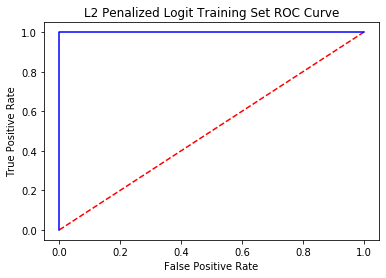

1.0


In [40]:

y_pred = ridgeclassifier.predict(x_train)
y_pred = pd.Series(y_pred)
y_true = y_train
print_metrics(y_true, y_pred)
print_ROC(y_true,y_pred, 'L2 Penalized Logit Training Set ROC Curve')
#okay this one looks kinda wrong


Accuracy Score: 0.9222222222222223
Precision: 0.9565217391304348
Recall: 0.8979591836734694
F1 Score: 0.9263157894736843


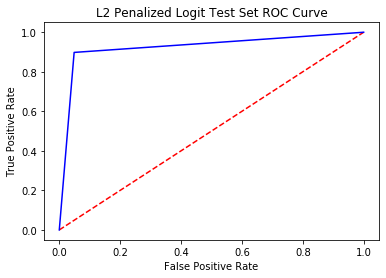

0.9245893479342957
A beta of 0.1 yields an F-beta score of: 0.9559044955904497
A beta of 0.5 yields an F-beta score of: 0.9442060085836909
A beta of 0.9 yields an F-beta score of: 0.9293966623876764
A beta of 1 yields an F-beta score of: 0.9263157894736843
A beta of 5 yields an F-beta score of: 0.9000786782061369
A beta of 10 yields an F-beta score of: 0.8985038414880712


In [27]:
y_pred = ridgeclassifier.predict(x_test)
y_pred = pd.Series(y_pred)
y_true = y_test
print_metrics(y_true, y_pred)
print_ROC(y_true,y_pred, 'L2 Penalized Logit Test Set ROC Curve')

beta_array = [.1, .5, .9, 1, 5, 10]
for x in beta_array:
    Fb = fbeta_score(y_true, y_pred, beta=x)
    print("A beta of " + str(x) + " yields an F-beta score of: " + str(Fb))
    




In [ ]:
# Precision is more important in this scenario. We do not want to be flagging
# real emails as spam (false positives) and sending them to the spam folder potentially--that does more harm
# than allowing a few spam emails into the inbox (false negatives).


start
Accuracy Score: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


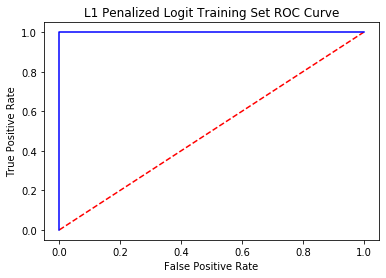

1.0


In [41]:
print('start')
logisticclassifier = LogisticRegressionCV(cv=5, random_state=0, penalty='l1', solver='saga', max_iter = 4000).fit(x_train, y_train)
y_pred = logisticclassifier.predict(x_train)
y_pred = pd.Series(y_pred)
y_true = y_train
print_metrics(y_true, y_pred)
print_ROC(y_true,y_pred, 'L1 Penalized Logit Training Set ROC Curve')
##########PLEASE BE ADVISED THIS TAKES LIKE 3 MINUTES TO RUN, SORRY I WAS GETTING CONVERGENCE ISSUES



Accuracy Score: 0.9
Precision: 0.9761904761904762
Recall: 0.8367346938775511
F1 Score: 0.9010989010989012


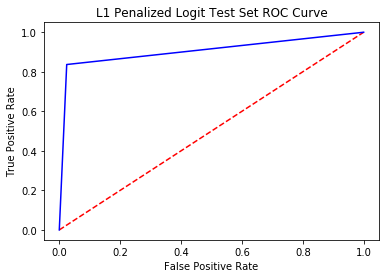

0.906172224987556


In [42]:
y_pred = logisticclassifier.predict(x_test)
y_pred = pd.Series(y_pred)
y_true = y_test
print_metrics(y_true, y_pred)
print_ROC(y_true,y_pred, 'L1 Penalized Logit Test Set ROC Curve')

Accuracy Score: 0.9972067039106145
Precision: 1.0
Recall: 0.9948979591836735
F1 Score: 0.9974424552429668


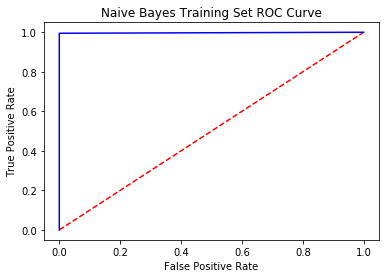

0.9974489795918368
Accuracy Score: 0.8666666666666667
Precision: 0.8032786885245902
Recall: 1.0
F1 Score: 0.8909090909090909


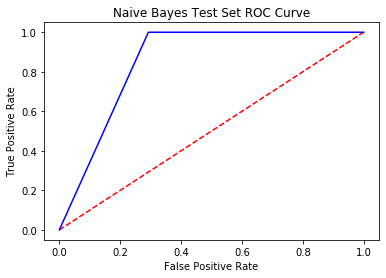

0.8536585365853658


In [43]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(x_train, y_train)
GaussianNB()

train_proba = nbclassifier.predict_proba(x_train)
train_proba = train_proba[:,1]
test_proba = nbclassifier.predict_proba(x_test)
test_proba = test_proba[:,1]

################## Training ###################
y_pred = nbclassifier.predict(x_train)
y_pred = pd.Series(y_pred)
y_true = y_train
print_metrics(y_true, y_pred)
print_ROC(y_true,y_pred, 'Naive Bayes Training Set ROC Curve')


##################Test#######################
y_pred = nbclassifier.predict(x_test)
y_pred = pd.Series(y_pred)
y_true = y_test
print_metrics(y_true, y_pred)
print_ROC(y_true,y_pred, 'Naive Bayes Test Set ROC Curve')